In [1]:
import pandas as pd

In [2]:
df1 = pd.read_parquet("alg-data/random-data.parquet")
df1["sampling"] = "random"
print(len(df1))
df1.head(n=1)

11935


,client_num_ans,loop_start_time,get_query_time,alg_ident,score,head,left,right,winner,post_answer_time,...,R,sampling,random_state,initial_batch_size,optimizer,optimizer__lr,optimizer__momentum,accuracy,embedding_max,get_model_time
0,1,1.596675e+09,0.030053,TSTE,1.0,44,65,27,65,0.011159,...,10,random,1,4,Embedding,0.1,0.9,0.501971,0.000243,0.068252


In [3]:
df2 = pd.read_parquet("alg-data/adaptive-data.parquet")
df2["sampling"] = "adaptive"
print(len(df2))
df2.tail(n=1)

11923


,client_num_ans,loop_start_time,get_query_time,alg_ident,score,head,left,right,winner,post_answer_time,...,R,sampling,random_state,initial_batch_size,optimizer,optimizer__lr,optimizer__momentum,accuracy,embedding_max,get_model_time
11922,11951,1.596674e+09,0.021072,TSTE,-0.905089,23,77,25,77,0.009101,...,10,adaptive,1,4,Embedding,0.1,0.9,0.712155,5.346471,0.072149


In [4]:
df3 = pd.read_parquet("alg-data/random-data-seed-42.parquet")
df3["sampling"] = "random (diff. seed)"
print(len(df3))
df3.tail(n=1)

11927


,client_num_ans,loop_start_time,get_query_time,alg_ident,score,head,left,right,winner,post_answer_time,...,R,sampling,random_state,initial_batch_size,optimizer,optimizer__lr,optimizer__momentum,accuracy,embedding_max,get_model_time
11926,11951,1.596660e+09,0.035289,TSTE,1.0,82,5,65,65,0.013129,...,10,random (diff. seed),42,4,Embedding,0.1,0.9,0.718198,4.739965,0.051958


In [5]:
df = pd.concat((df1, df2, df3))

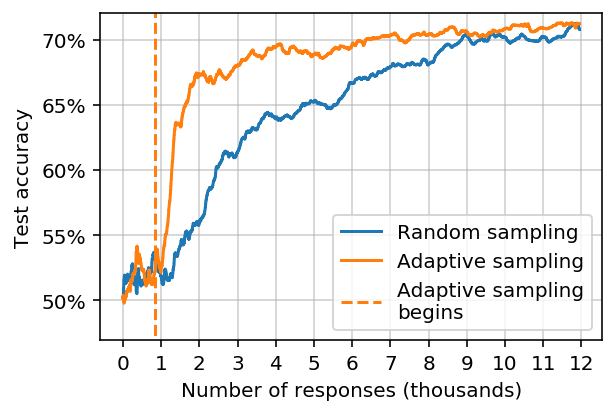

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


df["client_num_ans_thousands"] = df["client_num_ans"] / 1000
w = 3
fig, ax = plt.subplots(figsize=(1.5 * w, w))

s = df[df["sampling"] == "random"]
ax.plot(s["client_num_ans_thousands"], s["accuracy"], label="Random sampling")

s = df[df["sampling"] == "adaptive"]
ax.plot(s["client_num_ans_thousands"], s["accuracy"], label="Adaptive sampling")

## Left out because different random state
# s = df[df["sampling"] == "random (diff. seed)"]
# ax.plot(s["client_num_ans_thousands"], s["accuracy"], "C2--", label="Random sampling\n(different seed)")

## Plotting limit where adaptive starts
lim = df.iloc[-1]["n"] * df.iloc[-1]["R"]
lim /= 1000
ax.plot([lim, lim], [0, 1], "C1--", label="Adaptive sampling\nbegins")


_ = ax.set_ylim(0.47, 0.72)
ax.grid(alpha=0.6)
ax.set_ylabel("Test accuracy")
ax.legend(loc="best")
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:0.1f}%".format(x * 100)))
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:}%".format(int(x * 100))))
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlabel("Number of responses (thousands)")
fig.savefig("imgs/adaptive.png", dpi=300, bbox_inches="tight")

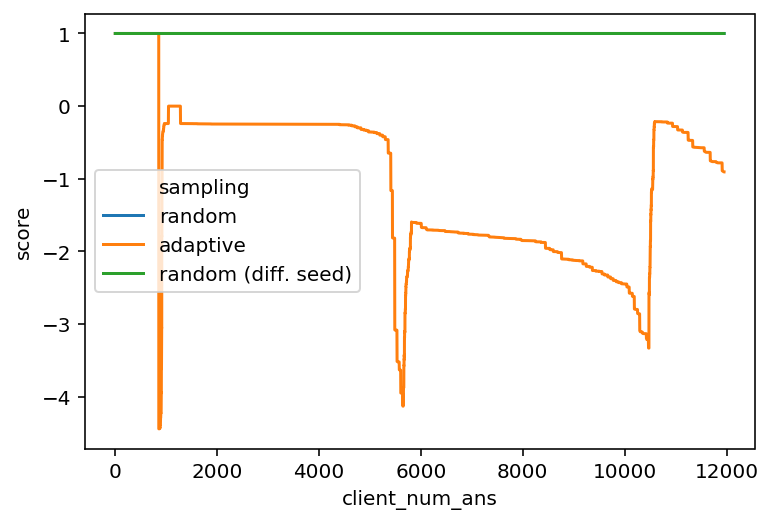

In [19]:
import seaborn as sns
sns.lineplot(
    x="client_num_ans",
    y="score",
    hue="sampling", data=df, ci=None,
)

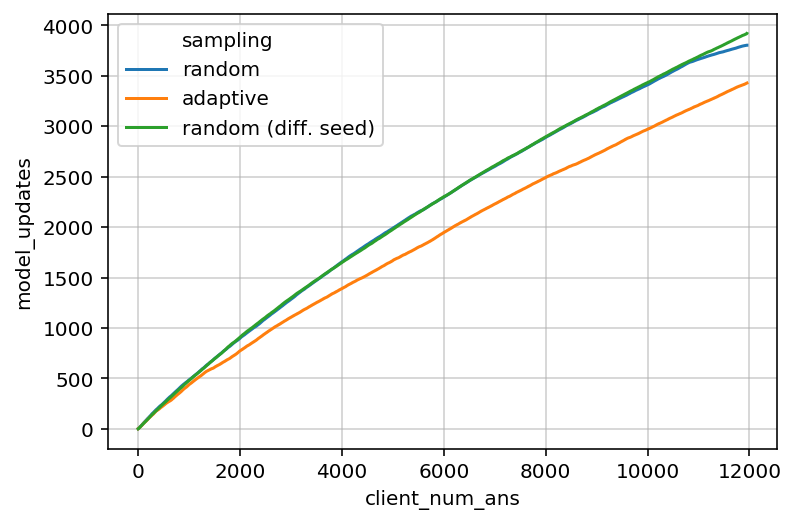

In [20]:
import seaborn as sns
ax = sns.lineplot(
    x="client_num_ans",
#     x="num_ans",
    y="model_updates",
    hue="sampling", data=df, ci=None,
)
ax.grid(alpha=0.6)

In [19]:
df.columns

Index(['client_num_ans', 'loop_start_time', 'get_query_time', 'alg_ident',
       'score', 'head', 'left', 'right', 'winner', 'post_answer_time',
       'num_ans', 'model_updates', 'n', 'd', 'R', 'sampling', 'random_state',
       'initial_batch_size', 'optimizer', 'optimizer__lr',
       'optimizer__momentum', 'accuracy', 'embedding_max', 'get_model_time'],
      dtype='object')

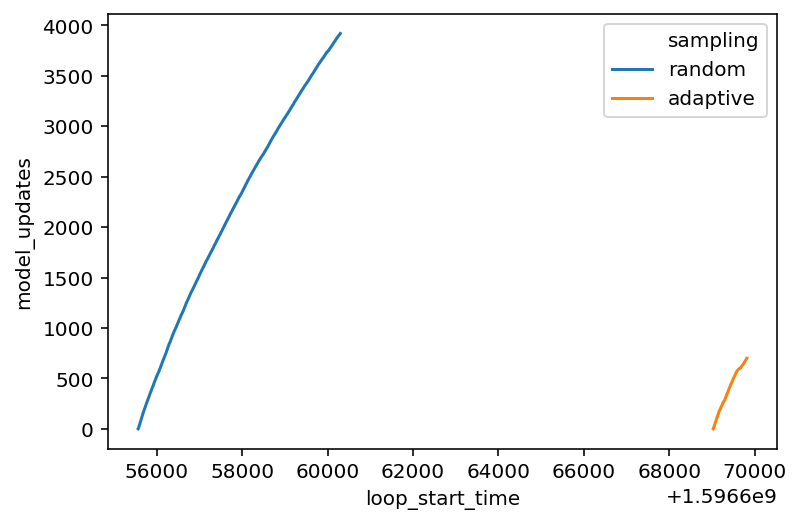

In [20]:
import seaborn as sns
sns.lineplot(
    x="loop_start_time",
    y="model_updates",
    hue="sampling",
    data=df,
    ci=None,
)

In [21]:
n_ans = df.client_num_ans[df.sampling == "adaptive"].max()
mu_a = df.model_updates[df.sampling == "adaptive"].max()

In [22]:
mu_r = df.loc[(df["client_num_ans"] == n_ans) & (df.sampling == "random"), "model_updates"]

In [23]:
mu_r / mu_a

1790    1.18
Name: model_updates, dtype: float64